# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
dataDir = "G:AV datasets/inD-dataset-v1.0/data/"
# dataDir = "E:/Datasets/inD-dataset-v1.0/data/"

In [2]:
exec(open('init_notebook.py').read())
%load_ext autoreload
%autoreload 2
%tb

current working dirE:\AV\DataSetExploration\drone-dataset-tools\src


No traceback available to show.


In [3]:
import logging
logging.basicConfig(level=logging.INFO)
from loguru import logger
logger.remove()
logger.add(sys.stdout, format="{level} {message}", filter="my_module", level="INFO")

from extractors.loader import Loader
from tools.TrajectoryUtils import TrajectoryUtils

In [4]:
loader = Loader(dataDir, 'inD')

In [5]:
loc2data = loader.getLocationData(2, useSceneConfigToExtract=True, precomputeSceneData=False)

INFO:root:recordingIds: [25]
INFO:root:Downsampling recording 25 from 25.0 to 5
downsampling: 100%|█████████████████████████████████████████████████████████| 672514/672514 [00:41<00:00, 16213.02it/s]


In [6]:
sceneId = 21
sceneConfig = {
      "centerXPixel": 302.5,
      "centerYPixel": 345.5,
      "centerX": 29.57,
      "centerY": -33.77,
      "angle": 16.0,
      "roadWidth": 9.0,
      "boxWidth": 15.0
    }
boxWidth = sceneConfig["boxWidth"]
roadWidth = sceneConfig["roadWidth"]
pedData = loc2data.getSceneCrossingDf(sceneId, boxWidth, roadWidth)
pedData.groupby(["uniqueTrackId"]).count()

crossing recording: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:52<00:00, 52.74s/it]


,index,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,lonVelocity,latVelocity,lonAcceleration,latAcceleration,sceneId,roadWidth
uniqueTrackId,,,,,,,,,,,,,,,,,,,,
25117,229,229,229,229,229,229,229,229,229,229,229,229,229,229,229,229,229,229,229,229
25288,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214
25300,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282
25445,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155
25472,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193


In [7]:
otherData = loc2data.getSceneOtherDf(sceneId)

other recording: 100%|██████████████████████████████████████████████████████████████████| 1/1 [02:09<00:00, 129.33s/it]


In [110]:
from extractors.SceneData import SceneData
sceneData = SceneData(
    2,
    0.00814636091724502,
    sceneId,
    sceneConfig,
    boxWidth,
    roadWidth,
    pedData=pedData,
    otherData=otherData,
    backgroundImagePath="G:AV datasets/inD-dataset-v1.0/data/18_background.png"
)

sceneData.buildLocalInformation()
# print(sceneData.warnings)

clipping ped trajectories for scene # 21 with width offset 4.0: 100%|████████████████████| 5/5 [00:00<00:00, 27.62it/s]
clipping other trajectories for scene # 21: 100%|████████████████████████████████████| 205/205 [00:04<00:00, 48.58it/s]
INFO:root:adding dynamics for scene 21
clipping ped trajectories for scene # 21 with width offset 0.0: 100%|████████████████████| 5/5 [00:00<00:00, 63.29it/s]


Disregarding trajectory for 25117 because the length 6.818050937222911 is too short and rows too short (27)
Disregarding trajectory for 25445 because the length 5.607284504164834 is too short and rows too short (53)
Clipping after trimming lost 2 pedestrian tracks: {25117, 25445}
['Disregarding trajectory for 25117 because the length 6.818050937222911 is too short and rows too short (27)', 'Disregarding trajectory for 25445 because the length 5.607284504164834 is too short and rows too short (53)', 'Clipping after trimming lost 2 pedestrian tracks: {25117, 25445}']


In [36]:
# trackId = 25117
localPedData = sceneData.getPedDataInSceneCoordinates()
# localPedData[localPedData["uniqueTrackId"]==trackId]
localPedData.groupby(["uniqueTrackId"]).size()

uniqueTrackId
25117    126
25288     71
25300     58
25445     65
25472     48
dtype: int64

In [19]:

localOtherData = sceneData.getOtherDataInSceneCoordinates()
# localPedData[localPedData["uniqueTrackId"]==trackId]
localOtherData.groupby(["uniqueTrackId"]).size()

uniqueTrackId
25000    36
25003    50
25007    60
25008    83
25021    85
         ..
25529    53
25532    54
25535    44
25536    35
25538     6
Length: 205, dtype: int64

In [20]:
# pedData[(pedData["uniqueTrackId"]==trackId)]

In [21]:

# pedData.groupby(["uniqueTrackId"]).count()

In [47]:
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(loader)

In [48]:
# sceneData.sceneConfig
# sceneData.orthoPxToMeter

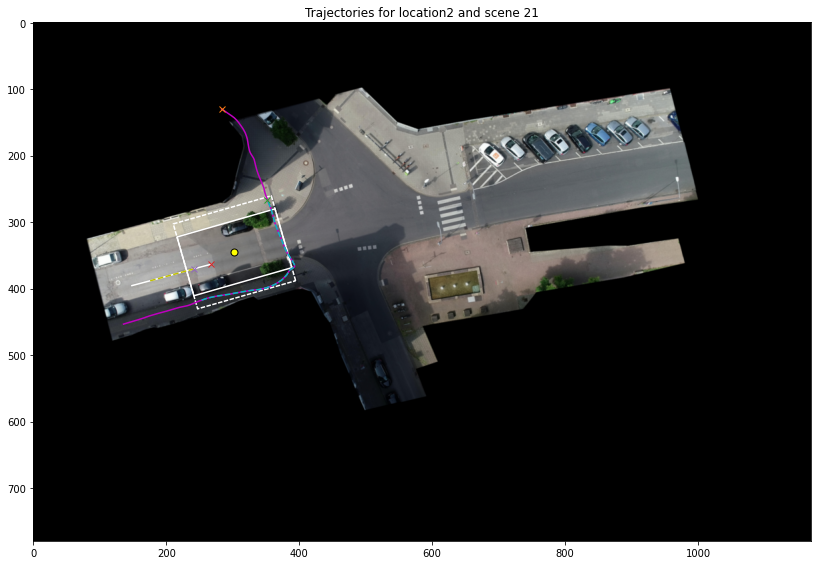

In [76]:
visualizer.showLocationSceneData(sceneData, onlyClipped=False, showLocal=False, showOthers=True, ids=[25538, 25117])

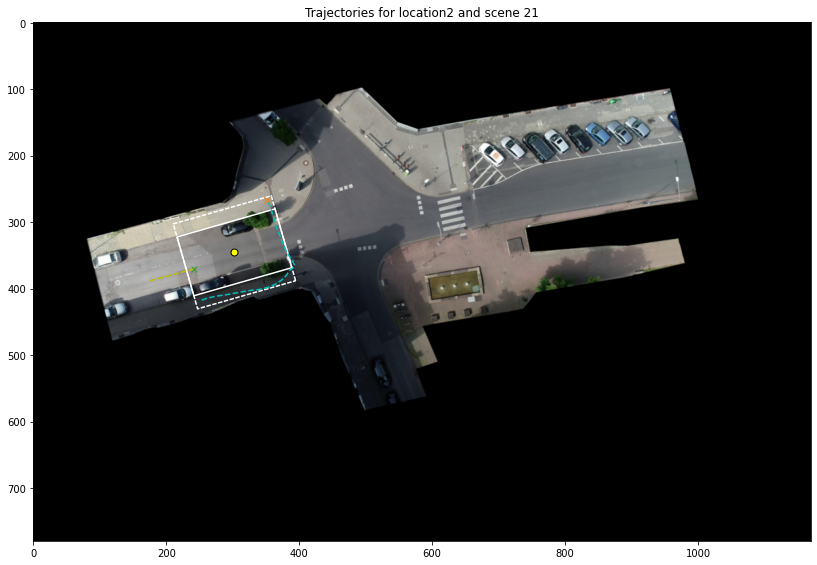

In [77]:
visualizer.showLocationSceneData(sceneData, onlyClipped=True, showLocal=False, showOthers=True, ids=[25538, 25117])

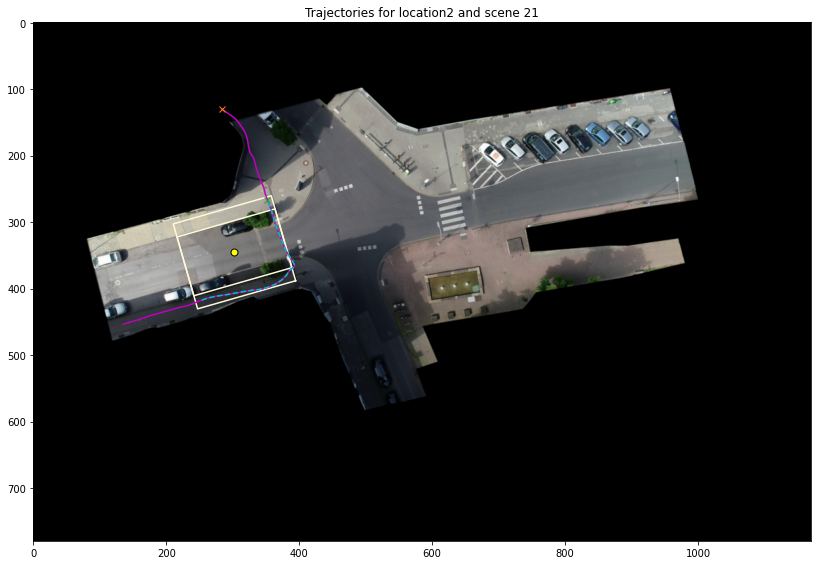

In [88]:
visualizer.showLocationSceneData(sceneData, onlyClipped=False, showLocal=False, showOthers=True, ids=[25117])

In [16]:
ped25117 = pedData[pedData["uniqueTrackId"]==25117]

In [17]:
ped25117.to_csv("../data/ped25117.csv")

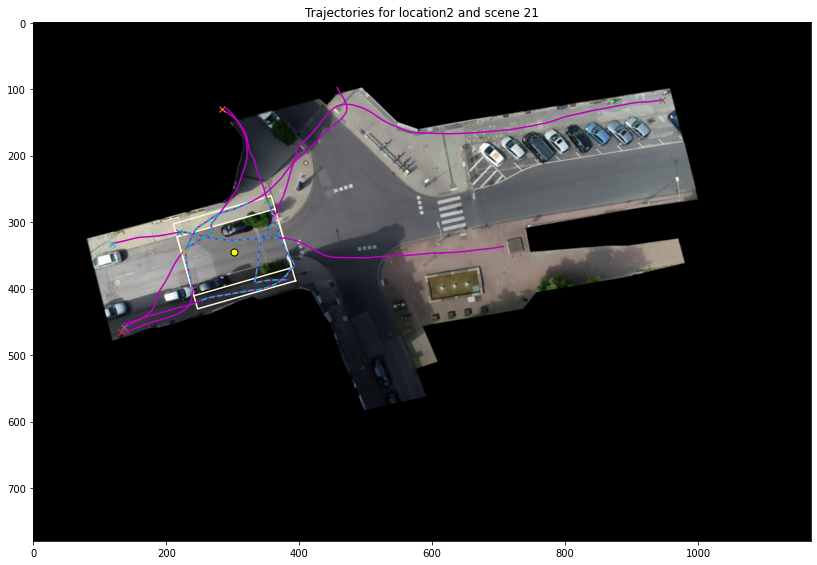

In [87]:
# visualize all peds
from math import ceil
allPedIds = sceneData.uniquePedIds()
limit = 10
nPedIds = len(allPedIds)
nPages = ceil(nPedIds / limit)
for page in range(nPages):
    offset = page * limit
    visualizer.showLocationSceneData(sceneData, onlyClipped=False, showLocal=False, showOthers=False, offset=offset, limit=limit)